In [1]:
#미분이란 순간 변화량 . 을 구하는 것 

import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd
import os 

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris
# iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" , header = None) 
# iris 안에 url 링크로 iris data 불러온뒤 헤더가 1번째 값이 들어가있어서 header 를 None 해서  0~ 시작하게 만듬.

iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris    
    
label = {"Iris-setosa" : 0 ,"Iris-versicolor" :1 , "Iris-virginica" : 2 } #딕셔너리 형태로 setosa 는 0 으로 ... 해서 label에 넣음
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
X = iris.iloc[: , 0:4].values #iris 의 0~ 3 에 있는 모든 값 불러서 X 에 대입 
X = X[: , [0,2]] # 0 하고 , 2 번째 콜롬만 X 에 덮어쓰기. 
y = iris.iloc[: , 4].map(label).values  # iris에 모든 값에서 3번째까지만 근데 그 벨류를 위에 label 만든걸 map 함수써서 
#                                         values 안에다가 넣기. 그러면 setosa-> 0 ... 으로 바꿔줌 


IndexError: positional indexers are out-of-bounds

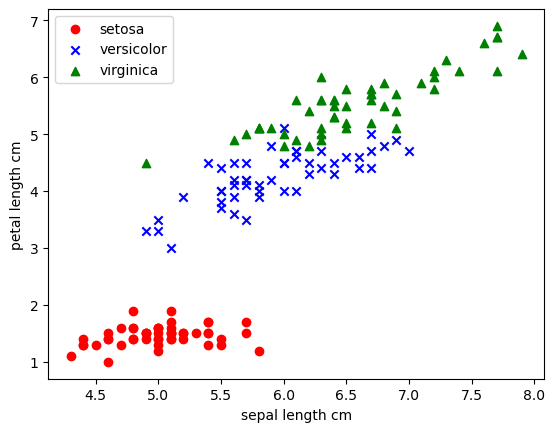

In [56]:
 plt.figure() #그림 그리기 틀 만들고 
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker="o", label="setosa")
# Scatter 를 써서  X 축에 y (모든값 0~2 넣은곳)에 y ==0 이면 그걸 False  로, Y축에 y 가 0이면  True 로 
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="x", label="versicolor")

plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", marker="^", label="virginica")
#이렇게 3개를 써서 한 그래프 안에 다 넣음. label은 그래프 오른쪽상단 모양표시, market 와 색은 모양과 색
plt.xlabel("sepal length cm") #x 축 이름
plt.ylabel("petal length cm") #y 축 이름
plt.legend() # legend 를 씀으로 label 표시
plt.show() # 그래프 표시

In [58]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [40]:
# Logistic 회귀  
from sklearn.linear_model import LogisticRegression # linear 모델 (선형모델) 선을긋겠다 는뜻.
lr = LogisticRegression(solver = "liblinear" , multi_class  = "auto" , C = 100 , random_state=1) 
# solver = liblinear 로지스틱 회기를 풀기 위해 사용할 최적화 알고리즘 지정. 

#liblinear 는 작은 데이터셋에 적합한 알고리즘. 

# multi_class 다중 클래스 분류수행시 사용방법을 자동으로 선택하도록 지정 

#C -- 규제(regularization) 규제강도를 조절하는 매개변수 
#작은 값은 강한규제를 의미 , 큰값은 약한 규제 의미 . 빨강이랑 파랑이랑 거리얼마나 둘것이냐

#random_state = 1 난수초기화 에 사용되는 시드(seed) 값으로 결과를 재현하기위해 설정
#초기값설정안하면 초기값이 달라지므로 데이터 분할 결과도 달라질 수 있음. 
#초기값이 동일하므로 데이터 분할 결과도 항상 동일하게 유지됩니다

lr.fit(X,y) # LogisticRegression 모델을 주어진 데이터 X 와 클래스 레이블 y 에 대해 학습. 예측학습
plot_decision_regions(X, y , lr) # plot_decision_regions 함수로 데이터 포인트와 결정경계 시각화 
# X 는 입력데이터 , y 는 클래스 레이블 , lr 는 학습된 로지스틱 회귀모델.
plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
plt.legend()
plt.show()

C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [16]:
# 회귀 (regression)  관측된 데이터를 통해 독립변수와 종속변수 사이의 숨어있는 관계를 추정하는 것 . 

#선형회귀 (linear regression) y = f(x)에서 입력x 에 대응되는 실수 y 들이 주어지고 추정치 f(x) 가 가진 오차를 측정
# 이 오차를 줄이는 방향으로 함수의 계수를 최적화하는 일.


#좋은 가설은 오차(error)가 작은 가설
  #회귀분석은 데이터를 설명하는 좋은 가설을 찾는걸. 
    
    
# 선형회귀 결정선을 직선으로 긋고 1차방정식

# 다항회귀(비성형회귀) 는 굽어있는 데이터도 나타낼수있고 이걸  2차방정식 이상 

# 분류 

In [24]:
pol = pd.read_csv("https://raw.githubusercontent.com/dknife/ML/main/data/pollution.csv") # url 을 불러서 pol 에 선언
# pol

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


In [2]:
X = pol["input"].values.reshape(-1,1)   #input 컬럼에 있는 값들을 1줄 100열 -> 100줄 1 열 로 만듬. 
y = pol["pollution"].values.reshape(-1,1)  #pollution 에 있는 값들을 1행 100열 -> 100행 1열로 만듬
# print(X.shape)
# print(y.shape)

NameError: name 'pol' is not defined

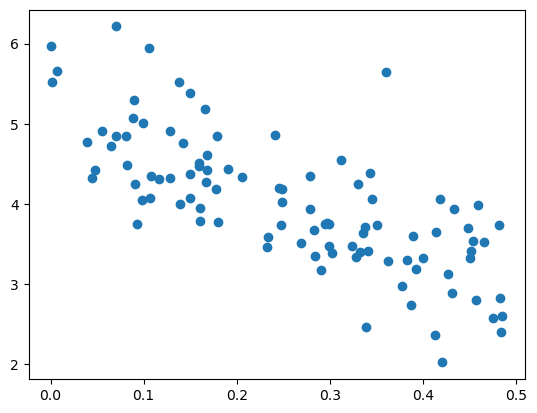

In [10]:
plt.figure() # 그림판 만들고
plt.scatter(X , y) #scatter 로 그리기. X는 input에 있는 100열 1열, y는 pullution에 있는, 100행 1열
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X,y)

LinearRegression()

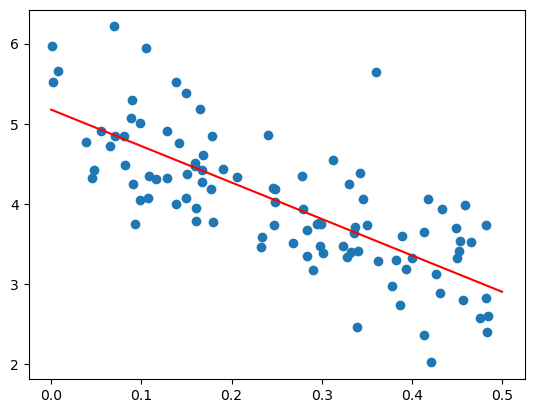

In [33]:
plt.figure()
plt.scatter(X , y)
plt.plot([0,0.5], lr2.predict([[0],[0.5]]), color ="red")
plt.show()
#빨간선이 얼마나 잘맞췃는지  

# 3가지 평가지표 MSE , MAE , RMSE

#MSE (Mean Squared Error) 평균 제곱 오차
#예측 값과 실제 값 간의 차이를 제곱하여 평균한 값
# (1/n)sum(y - p )^2 
# 

#MAE  (Mean Absolute Error) 평균 절대 오차 
# 성능을 평가하는 지표, 예측,실제값 간 차이의 절대값을 평균한 값
# (1/n)sum(|y|-|p|)

# RMSE (root mean squared error) 평균 제곱근 오차
#오차 값의 크기를 해석하기 쉽도록 변환
# pow(MSE , 2 ) -->   pow((1/n)sum(y - p )^2 , 2 ) 


In [38]:

# 머신러닝할때는 sklearn 사이트를 자주 봐야함. 

from sklearn.metrics import mean_squared_error , mean_absolute_error , accuracy_score
# mean_squared_error --> MSE 
# mean_absolute_error --> MAE
p = lr2.predict(X) # lr linear regression을 만들고 fit으로 예측시켜준걸 lr2 에 담고 그걸 predict 해서 X 값을 넣은걸 p로 선언 
print(mean_squared_error( y , p )) #그리고 y 는 값들(실제값), p는 예측한값, 그거에 대한 평균제곱오차  -> 예측값과 오차값의 차이
# 예측 값과 실제 값 사이의 오차의 제곱을 평균한 결과이며, 값이 작을수록 모델의 성능이 좋다고 해석됩니다.

print(mean_absolute_error( y , p )) # 이건 평균 절대 오차 
# 예측 값과 실제 값 간의 차이의 절대값을 평균한 값으로, 값 사이의 오차의 절대값을 평균한 결과이며,
#값이 작을수록 모델의 성능이 좋다고 해석됩니다.


0.3097239682341082
0.43306411603377926


In [39]:

from sklearn.metrics import accuracy_score #accuracy_score --> 정확도 
p = lr.predict(X)  #정확도 = (일치하는 샘플 수) / (전체 샘플 수) 
accuracy_score(y , p) 
#값이 0에서 1 사이의 범위에 있으며, 1에 가까울수록 모델의 성능이 좋다고 판단됩니다.

NameError: name 'lr' is not defined

C:\Users\carlo\AppData\Local\Temp\ipykernel_8784\2590469481.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\carlo\AppData\Local\Temp\ipykernel_8784\2590469481.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


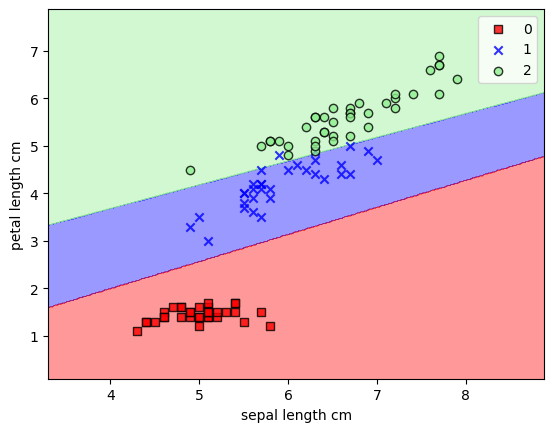

In [247]:
# 결정 경계(Decision Boundary)를 시각화
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#train_test_split 함수는 주어진 입력 데이터 X와 대상 변수(종속 변수) y를 훈련 데이터와 테스트 데이터로 분할하는 역할을 함.
#이를 통해 모델을 훈련하기 위한 훈련 데이터와 모델의 성능을 평가하기 위한 테스트 데이터를 나눌 수 있음
#test_size 매개변수는 테스트 데이터의 비율을 설정하며, random_state는 데이터 분할 시의 재현 가능한 랜덤 시드를 지정.
    
lr = LogisticRegression(solver = "liblinear" , multi_class  = "auto" , C = 100 , random_state=1) 
lr.fit(X_train , y_train)

plot_decision_regions(X_train, y_train , lr)
결정 경계 시각화:
# plot_decision_regions 함수는 훈련 데이터인 X_train과 y_train을 사용하여 결정 경계를 시각화하는 함수.
#이 함수는 입력 데이터의 특성(여기서는 sepal length와 petal length)을 x, y축으로 설정하고, 클래스 레이블에 따라 결정 경계를 그림.

plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
plt.legend()
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 105 but corresponding boolean dimension is 45

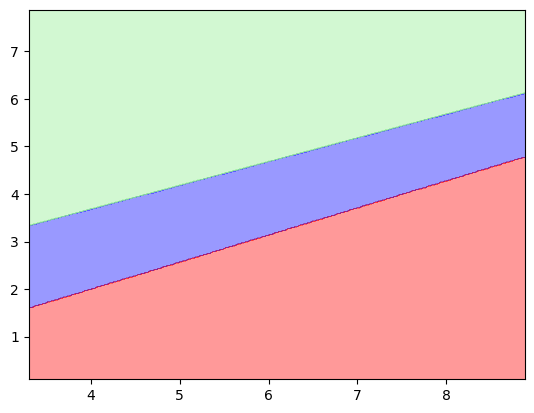

In [248]:
plot_decision_regions(X_train, y_test , lr)
plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
plt.legend()
plt.show()

In [249]:
p_train = lr.predict(X_train)
print(accuracy_score(y_train, p_train))

p_test = lr.predict(X_test)
print(accuracy_score(y_test, p_test))

0.9809523809523809
0.9111111111111111


ModuleNotFoundError: No module named 'mlxtend'

In [53]:
# sklearn 에서는 원래 데이터를 선형공간으로 펴서 선형공간으로 쓸수있도록 ㅆ?

from sklearn.preprocessing import PolynomialFeatures #전처리 
#PolynomialFeatures는 다항 특성을 생성하기 위한 전처리 클래스. 
# 이 클래스를 사용하면 입력 변수(독립 변수)의 다항식 특성을 만들 수 있음

life = pd.read_csv("https://raw.githubusercontent.com/dknife/ML/main/data/life_expectancy.csv")
life

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [54]:
life = life[["Life expectancy","Alcohol", "Percentage expenditure", "BMI" , "Polio" ,"GDP" , "Thinness 5-9 years" ]]
# 필요한것만 뽑아서 life에 선언 

life.dropna(inplace = True) # NaN는 모두 제거. 
life

,Life expectancy,Alcohol,Percentage expenditure,BMI,Polio,GDP,Thinness 5-9 years
0,65.0,0.01,71.279624,19.1,6.0,584.259210,17.3
1,59.9,0.01,73.523582,18.6,58.0,612.696514,17.5
2,59.9,0.01,73.219243,18.1,62.0,631.744976,17.7
3,59.5,0.01,78.184215,17.6,67.0,669.959000,18.0
4,59.2,0.01,7.097109,17.2,68.0,63.537231,18.2
...,...,...,...,...,...,...,...
2933,44.3,4.36,0.000000,27.1,67.0,454.366654,9.4
2934,44.5,4.06,0.000000,26.7,7.0,453.351155,9.9
2935,44.8,4.43,0.000000,26.3,73.0,57.348340,1.3
2936,45.3,1.72,0.000000,25.9,76.0,548.587312,1.7


In [55]:
X = life[["Alcohol", "Percentage expenditure", "BMI" , "Polio" ,"GDP" , "Thinness 5-9 years" ]]
y = life["Life expectancy"]

In [56]:
pf = PolynomialFeatures(degree = 3) 

# PolynomialFeatures 객체를 생성.
#degree 매개변수를 사용하여 생성할 다항식의 차수를 지정. 3차 다항식을 생성

X = pf.fit_transform(X)

# fit_transform 메서드를 사용하여 입력 데이터 X를 변환.
#fit_transform 메서드는 입력 데이터를 기반으로 다항식 특성을 생성.

In [57]:
lr = LinearRegression() #모델생성후
lr.fit(X , y) # X값과 y 을 학습시켜줌  

LinearRegression()

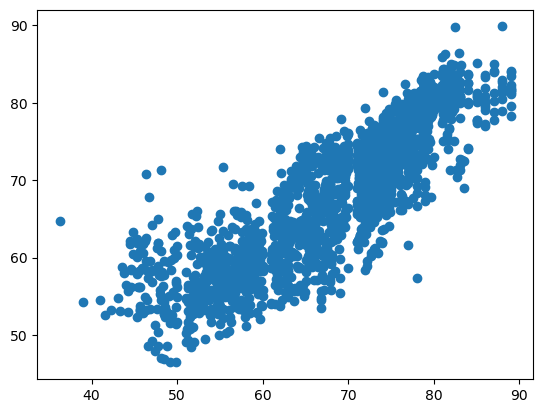

In [58]:
p = lr.predict(X) #X 값을 예측값을 만들어줌. 
plt.figure() #그림그릴판 생성후
plt.scatter(y , p ) # 실제값과 예측값을 satter로 그려줌
plt.show()

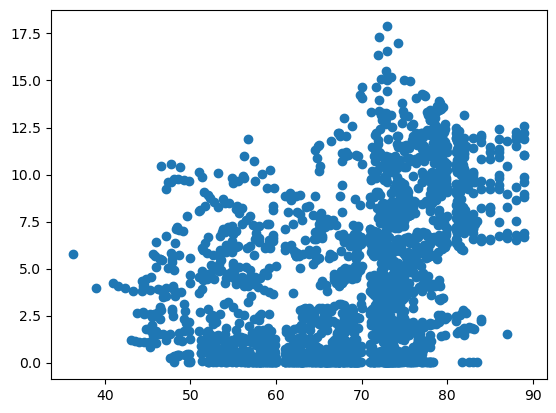

In [59]:
plt.figure()
plt.scatter(y , life["Alcohol"]) #실제값과  life["alcohol "] 값 
plt.show()

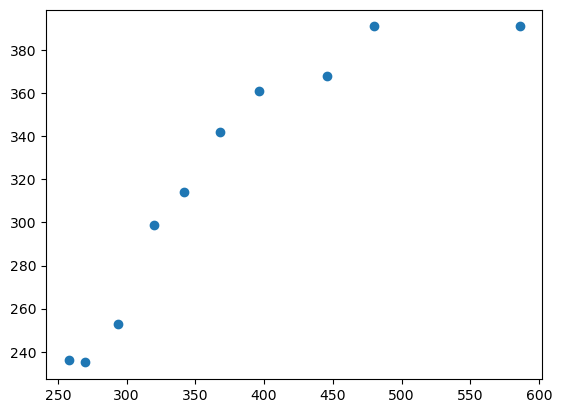

In [60]:
X = np.array([258 , 270 , 294 , 320 , 342 , 368 , 396 , 446 , 480 , 586])
y = np.array([236 , 235 , 253 , 299 , 314 , 342 , 361 , 368 , 391 , 391])
X = X.reshape(-1,1)
y = y.reshape(-1,1)
plt.figure()
plt.scatter(X,y)
plt.show()

In [69]:
lr1 = LinearRegression()
lr1.fit(X , y)

lr2 = LinearRegression()
pf = PolynomialFeatures(degree=2) 
X_pf = pf.fit_transform(X)
lr2.fit(X_pf, y)

LinearRegression()

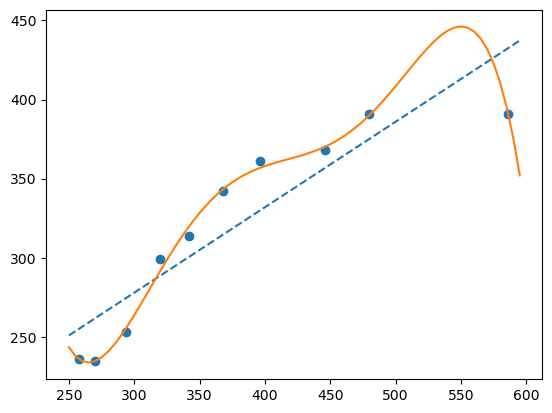

In [72]:
#선형모델 -> 비선형모델 로 바꿀수있다. ( 데이터 공간을 바꿈 )
Xr = np.arange(250,600, 10).reshape(-1,1) # 250. 260....600 까지를 만들고 이걸 1열 x 행 이였던걸  x열 1행 으로 reshape
plt.figure() #그림판 그리고 
plt.scatter(X,y) #X y 관계도 산점도로 그리기 
plt.plot(Xr , lr1.predict(Xr), linestyle = "--") 
plt.plot(Xr , lr2.predict(pf.transform(Xr)))
plt.show()